In [1]:
from funcoes_auxiliares import *

pd.options.display.float_format = "{:.2f}".format
pd.options.display.max_rows = 6

In [2]:
estado = "MG"

In [3]:
nome_arquivo_alimentacao = "../dados-limpos/aquisicao_por_classe_de_rendimento_e_estado/%s/dados-limpos/%s_alimentacao.csv" % (estado, estado)

In [4]:
nome_arquivo_despesas = "../dados-limpos/aquisicao_por_classe_de_rendimento_e_estado/%s/dados-limpos/%s_tipos_despesas.csv" % (estado, estado)

In [5]:
df_despesas = carregar_dataset_e_converter_dados(nome_arquivo_despesas)

In [6]:
df_despesas

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Total,Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Despesa total,4390.72,1501.78,2271.56,3697.32,6575.93,9589.42,14391.83,23891.78
1,Despesas correntes,4082.30,1457.93,2159.63,3510.91,6027.63,8811.94,13263.37,20768.46
2,Despesas de consumo,3635.92,1392.69,2039.02,3247.30,5409.91,7559.27,10752.93,15961.57
...,...,...,...,...,...,...,...,...,...
92,Prestação de imóvel,46.30,4.62,13.36,26.47,97.15,86.72,236.52,412.36
93,Número de famílias,7149295.00,1392069.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
94,Tamanho médio da família,2.93,2.36,2.69,3.13,3.48,3.11,2.93,3.02


In [7]:
df_alimentos = carregar_dataset_e_converter_dados(nome_arquivo_alimentacao)

In [8]:
df_alimentos

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Total,Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Despesas com alimentação,688.51,327.38,470.26,682.91,965.76,1183.04,1511.11,2111.32
1,Alimentação no domicílio,421.18,233.71,310.48,432.82,562.13,664.21,784.44,1013.62
2,"Cereais, leguminosas e oleaginosas",22.81,21.01,20.50,23.90,22.86,22.67,33.65,30.67
...,...,...,...,...,...,...,...,...,...
83,Outras,47.94,29.26,48.33,51.90,67.03,38.61,47.58,35.43
84,Número de famílias,7149295.00,1392069.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
85,Tamanho médio da família,2.93,2.36,2.69,3.13,3.48,3.11,2.93,3.02


In [9]:
df_alimentos = df_alimentos.drop(columns=['Total'])
df_alimentos = df_alimentos.drop(columns=['Despesa monetária e não monetária média mensal familiar (R$)'])

In [10]:
df_despesas = df_despesas.drop(columns=['Total'])
df_despesas = df_despesas.drop(columns=['Despesa monetária e não monetária média mensal familiar (R$)'])

In [11]:
colunas_datasets = list(df_despesas.columns)

In [12]:
colunas_datasets

['Tipos de despesa, número e tamanho médio das famílias',
 'Até 1908 (2)',
 'Mais de 1908 a 2862',
 'Mais de 2862 a 5724',
 'Mais de 5724 a 9540',
 'Mais de 9540 a 14310',
 'Mais de 14310 a 23850']

In [13]:
dict_colunas_datasets = {}

for i, coluna in enumerate(colunas_datasets):
    dict_colunas_datasets.update({coluna:i})

In [14]:
dict_colunas_datasets

{'Tipos de despesa, número e tamanho médio das famílias': 0,
 'Até 1908 (2)': 1,
 'Mais de 1908 a 2862': 2,
 'Mais de 2862 a 5724': 3,
 'Mais de 5724 a 9540': 4,
 'Mais de 9540 a 14310': 5,
 'Mais de 14310 a 23850': 6}

In [15]:
df_despesas = df_despesas.drop([0, 1, 2]).reset_index(drop=True)

In [16]:
df_despesas

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação,470.26,682.91,965.76,1183.04,1511.11,2111.32
1,Habitação,817.04,1148.45,1658.10,2278.54,3102.18,4744.36
2,Aluguel,423.40,581.47,799.82,1098.35,1430.00,2098.02
...,...,...,...,...,...,...,...
89,Prestação de imóvel,13.36,26.47,97.15,86.72,236.52,412.36
90,Número de famílias,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
91,Tamanho médio da família,2.69,3.13,3.48,3.11,2.93,3.02


In [17]:
df_alimentos = df_alimentos.drop([0]).reset_index(drop=True)

In [18]:
df_alimentos

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação no domicílio,310.48,432.82,562.13,664.21,784.44,1013.62
1,"Cereais, leguminosas e oleaginosas",20.50,23.90,22.86,22.67,33.65,30.67
2,Arroz,13.31,15.60,13.85,12.66,14.22,12.00
...,...,...,...,...,...,...,...
82,Outras,48.33,51.90,67.03,38.61,47.58,35.43
83,Número de famílias,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
84,Tamanho médio da família,2.69,3.13,3.48,3.11,2.93,3.02


In [19]:
df_despesas = retorna_dataset_com_soma_colunas_classes_sociais(df_despesas, colunas_datasets)

In [20]:
df_despesas

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação,470.26,682.91,965.76,1183.04,1511.11,2111.32
1,Habitação,817.04,1148.45,1658.10,2278.54,3102.18,4744.36
2,Aluguel,423.40,581.47,799.82,1098.35,1430.00,2098.02
...,...,...,...,...,...,...,...
90,Número de famílias,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
91,Tamanho médio da família,2.69,3.13,3.48,3.11,2.93,3.02
92,Total gasto por classes,4723.72,7618.75,13440.48,19663.04,29365.22,48634.53


In [21]:
df_alimentos = retorna_dataset_com_soma_colunas_classes_sociais(df_alimentos, colunas_datasets)

In [22]:
df_alimentos

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação no domicílio,310.48,432.82,562.13,664.21,784.44,1013.62
1,"Cereais, leguminosas e oleaginosas",20.50,23.90,22.86,22.67,33.65,30.67
2,Arroz,13.31,15.60,13.85,12.66,14.22,12.00
...,...,...,...,...,...,...,...
83,Número de famílias,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
84,Tamanho médio da família,2.69,3.13,3.48,3.11,2.93,3.02
85,Total gasto por classes,1213.81,1756.74,2422.97,2943.34,3699.75,5071.83


## Análise para despesas no geral

Quantidade de itens para o top N itens que mais são consumidos dentre as despesas

In [23]:
qtd_top_itens = 5

Quantidade exata de linhas para exibir no dataset

In [24]:
pd.options.display.max_rows = qtd_top_itens + 1

### Análise para a primeira classe social "Até 1908 (2)"

ID da coluna da classe social no dataframe

In [25]:
id_1908 = dict_colunas_datasets['Até 1908 (2)']

Lista dos N índices que mais foram consumidos dentre as despesas

In [26]:
top_N_despesas_1908 = retorna_indices_top_N_itens_mais_vendidos_por_classe_social(df_despesas, id_1908, colunas_datasets, qtd_top_itens)

Lista dos N itens que mais foram consumidos dentre as despesas

In [27]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_despesas, id_1908, top_N_despesas_1908)

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2)
1,Habitação,817.04
0,Alimentação,470.26
2,Aluguel,423.40
4,Aluguel não monetário,343.97
6,Serviços e taxas,237.69
92,Total gasto por classes,4723.72


Plot da mesma lista acima, ignorando o total de gastos por classe

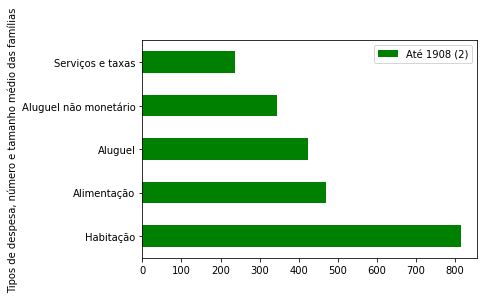

In [28]:
plot_grafico_barras_lista_top_N_itens(df_despesas, id_1908, colunas_datasets, top_N_despesas_1908, "green")

### Análise para a segunda classe social "Mais de 1908 a 2862"

In [29]:
id_2862 = dict_colunas_datasets['Mais de 1908 a 2862']

In [30]:
top_N_despesas_2862 = retorna_indices_top_N_itens_mais_vendidos_por_classe_social(df_despesas, id_2862, colunas_datasets, qtd_top_itens)

In [31]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_despesas, id_2862, top_N_despesas_2862)

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 1908 a 2862
1,Habitação,1148.45
0,Alimentação,682.91
2,Aluguel,581.47
26,Transporte,530.95
4,Aluguel não monetário,503.24
92,Total gasto por classes,7618.75


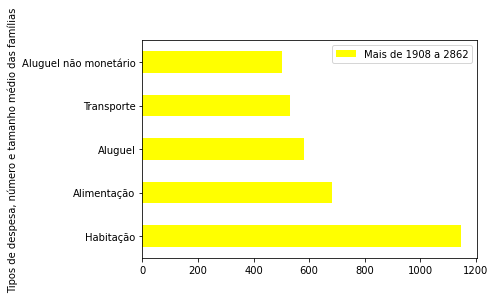

In [32]:
plot_grafico_barras_lista_top_N_itens(df_despesas, id_2862, colunas_datasets, top_N_despesas_2862, "yellow")